In [1]:
from model.model import *
from model.neural_network_model import *
from processing.data_processing import *
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',2000)
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

Using TensorFlow backend.


In [2]:
dataframes = load_data("../data/")
cleaned_data = pd.concat([FeatureEngineeringStatsBefore().fit_transform(data) for data in dataframes], axis=0)

x_train, y_train, x_test, y_test = split_dataset(cleaned_data, 0.3, "FTR")

In [7]:
transformers = [SelectBasicFeatures(["B365H", "B365D", "B365A"]),
                GetMonthYear()]

feature_engineering = MergeTransformers(transformers)

pipeline = Pipeline([("feature_engineering", feature_engineering),
                     ("model", RandomForestClassifier())])
pipeline.fit(x_train, y_train)
error = evaluate_model(pipeline, "Random Forest", pipeline.predict(x_test), y_test)

Random Forest
             precision    recall  f1-score   support

          A       0.44      0.47      0.45       119
          D       0.32      0.28      0.30       105
          H       0.58      0.60      0.59       181

avg / total       0.47      0.48      0.47       405



In [58]:
param_range = np.arange(1,100,10)

In [59]:
train_scores, test_scores = validation_curve(
    pipeline, 
    x_train, 
    y_train,
    param_name="model__n_estimators",
    param_range=param_range,
    cv=5,
    scoring="accuracy")

In [60]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [61]:
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [62]:
plt.plot(param_range, train_mean, '--', color="black", label="Training score")
plt.plot(param_range, test_mean, color="dimgrey", label="CV score")

In [63]:
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

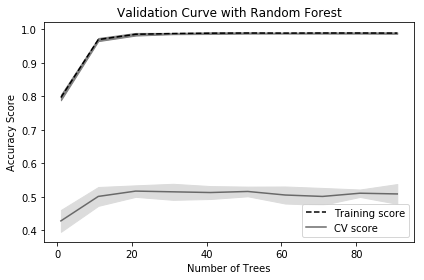

In [64]:
plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of Trees"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()